# **Aviachipta Narxini Bashorat Qilish**

![image.png](https://sputnik.kz/img/1021/14/10211465_0:98:1920:1178_2072x0_60_0_0_21e2cc78e5b83d6bfc3ebd26307d6707.jpg)
©️ image: sputnik.kz

---

## Business Understanding

- **Hindiston samolyot parvozlarining ma'lumotlari berilgan. Ulardan foydalangan holda chipta narxlarini bashorat qilish.**

## Exploratory Data Analysis

**Dataset Description**:
- **`ID`** - Ketma - ketlik uchun qo'yilgan sonlar.
- **`Airline`** - Parvoz qilingan aviakompaniya nomi.
- **`Flight`** - Parvoz qilingan ID raqami.
- **`Source_city`** - Parvoz qaysi shahardan boshlanishi.
- **`Departure_time`** - Samolyotning ketish vaqti.
- **`Stop`** - Parvoz davomida to'xtashlar soni.
- **`Arrival_time`** - Qaytish vaqti.
- **`Destination_city`** - Qaysi davlatga parvoz qilinayotgani.
- **`Class`** - Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.
- **`Duration`** - Parvoz davomiyligi.
- **`Days_left`** - Samolyotning qancha vaqtdan keyin uchishi.

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

sns.set()

In [2]:
train = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv")
test = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv")
sample_sub = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv")

In [3]:
train.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [4]:
test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [6]:
train.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


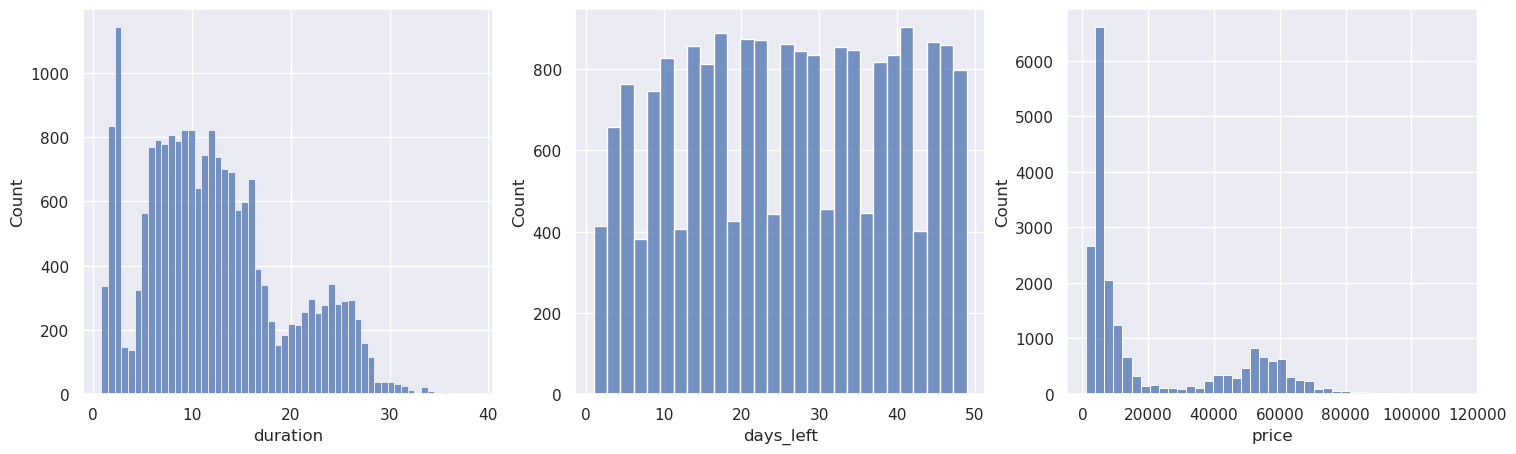

In [7]:
fig, axes = plt.subplots(1, 3, figsize=[18, 5])

sns.histplot(x=train['duration'], ax=axes[0])
sns.histplot(x=train['days_left'], ax=axes[1])
sns.histplot(x=train['price'], ax=axes[2])

plt.show()

- **Parvoz davomiyligining aksariyat qismi `6-16` soatga to'g'ri kelayapti.**

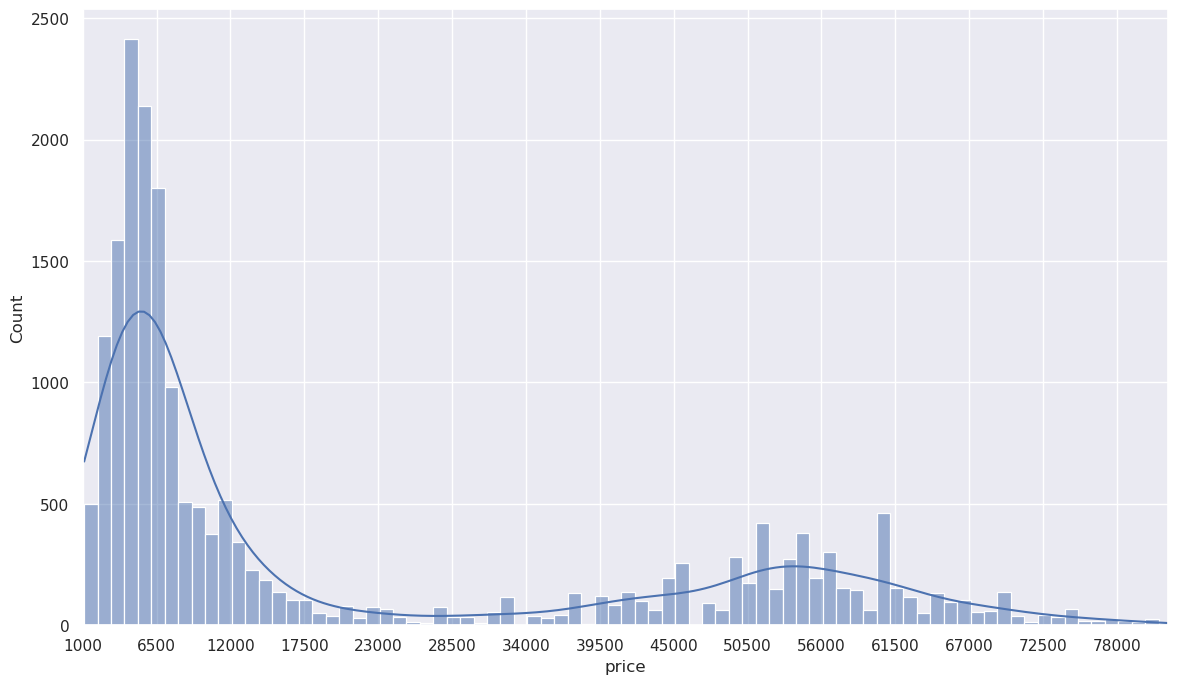

In [8]:
plt.figure(figsize=[14, 8])
data = train[train['price'] < 82_000]['price']
sns.histplot(x=data, kde=True, binwidth=1000)
plt.xlim(data.min()-100, data.max())
plt.xticks(range(data.min()-105, data.max(), 5500))
plt.show()

- **Ko'p sotiladigan chipta narxlari taxminan 1,100-12,000 oraliqda.**

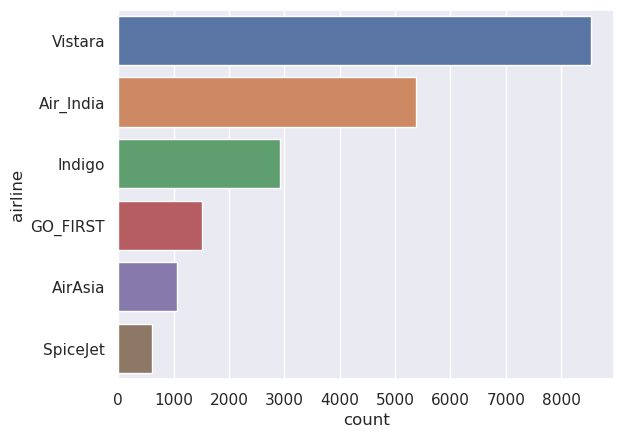

In [9]:
sns.countplot(y=train['airline'], order=train['airline'].value_counts().index);

- **Eng ko'p tarqalgan aviakompaniyalar: *Vistara*, *Air India* va *Indigo*.**

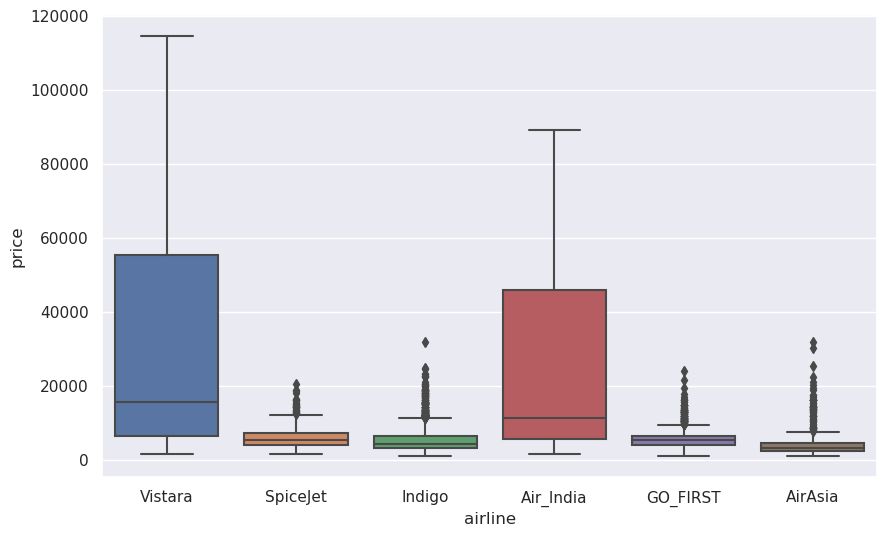

In [10]:
plt.figure(figsize=[10, 6])
sns.boxplot(x='airline', y='price', data=train);

- ***Vistara* va *Air India* avaikompaniyalarining o'rtacha uchish narxi (15,000-20,000) qolganlaridan sezilarli darajada (6,000-7,000) yuqori.**
- ***SpiceJet*, *Indigo*, *GO_FIRST* va *AirAsia* kompaniyalarida deyarli o'xshash narxlar.**

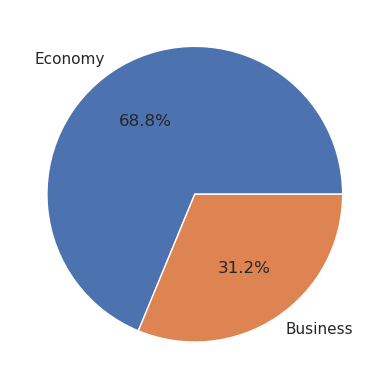

In [11]:
plt.pie(x=train['class'].value_counts(),
        labels=train['class'].value_counts().index,
        autopct='%1.1f%%'
);

- **Aksariyat aviakompaniyalarda *Economy* class o'rin olgan:**
    - **Economy class -> `69%`**
    - **Business class -> `31%`**

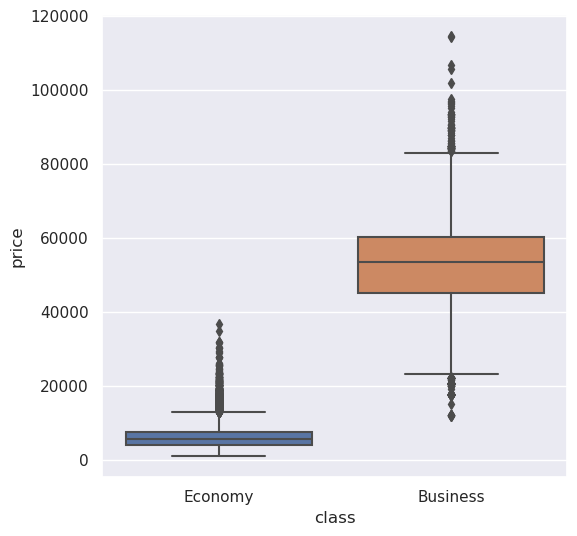

In [12]:
plt.figure(figsize=[6, 6])
sns.boxplot(x='class', y='price', data=train);

- ***Economy* classining o'rtacha narxi ~ `6,500`**
- ***Business* classining o'rtacha narxi ~ `52,000`**

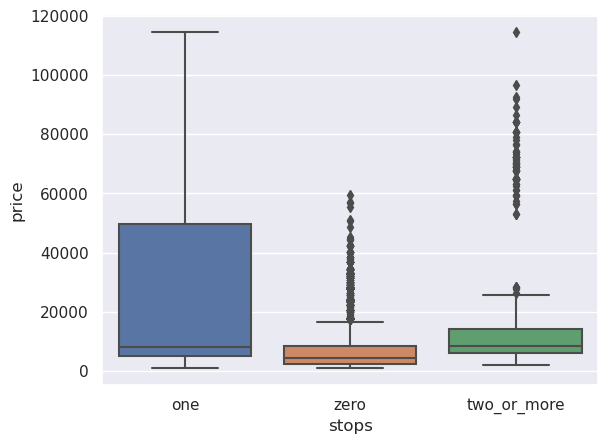

In [13]:
sns.boxplot(x='stops', y='price', data=train);

- **Bir marta to'xtab olish parvozlari eng qimmatroq narxga ega.**

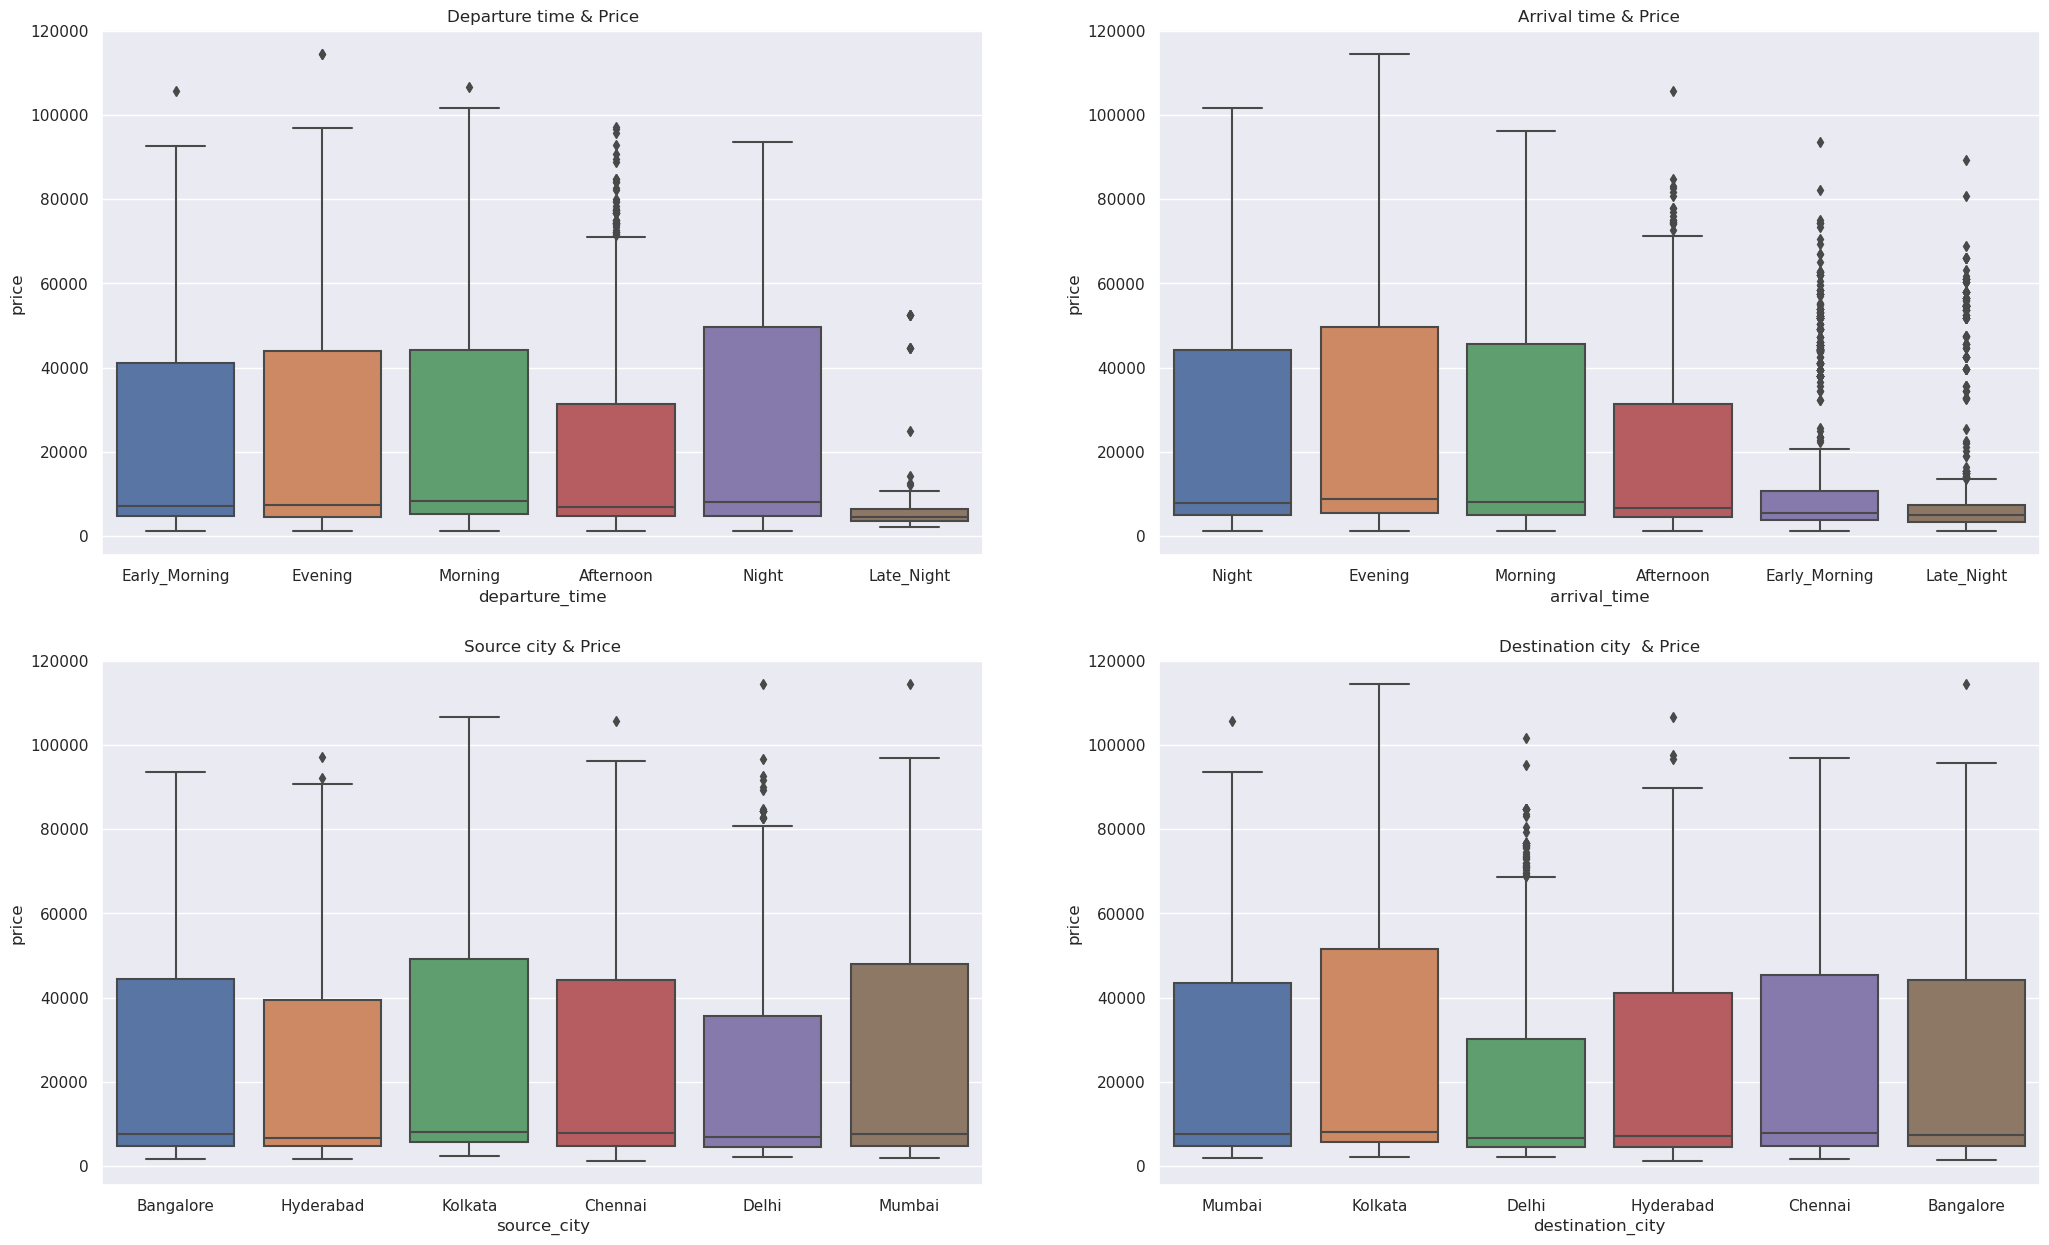

In [14]:
fig, ax = plt.subplots(2, 2, figsize=[25, 15])

sns.boxplot(x='departure_time', y='price', data=train, ax=ax[0, 0])
ax[0, 0].set_title("Departure time & Price")

sns.boxplot(x='arrival_time', y='price', data=train, ax=ax[0, 1])
ax[0, 1].set_title("Arrival time & Price")

sns.boxplot(x='source_city', y='price', data=train, ax=ax[1, 0])
ax[1, 0].set_title("Source city & Price")

sns.boxplot(x='destination_city', y='price', data=train, ax=ax[1, 1])
ax[1, 1].set_title("Destination city  & Price")

plt.show()

- **Jo'nash vaqti (`departure_time`):**
    - **Tunda bo'lgan parvozlar uchun uchish narxi qimmatroq.**
    - **Erta tonggi, kechki va ertalabki parvozlar narxi deyarli bir xil.**
    - **Kech tungi (Late_Night) parvozlarning narxi arzon.**


- **Qaytish vaqti (`arrival_time`):**
    - **Kechki parvozlar narxi qimmatroq.**
    - **Tungi va ertalabki parvozlar deyarli bir xil.**
    - **Erta tonggi (Early_Morning) va kech tungi (Late_Night) parvozlar arzon.**


- **Parvoz boshlangan shahar (`source_city`):**
    - **Kolkata va Mumbay shaharlari uchun qimmatroq.**
    - **Bangalor va Chennay shaharlari uchun deyarli bir xil narx.**
    - **Haydarobod va Dehli shaharlari uchun biroz arzon.**


- **Parvoz qilinayotgan shahar (`destination_city`):**
    - **Kolkata shahriga qimmatroq.**
    - **Mumbay, Haydarobod, Chennay va Bangalor shaharlariga uchish narxi bir-biriga yaqin.**
    - **Dehli shahriga arzonroq narx.**

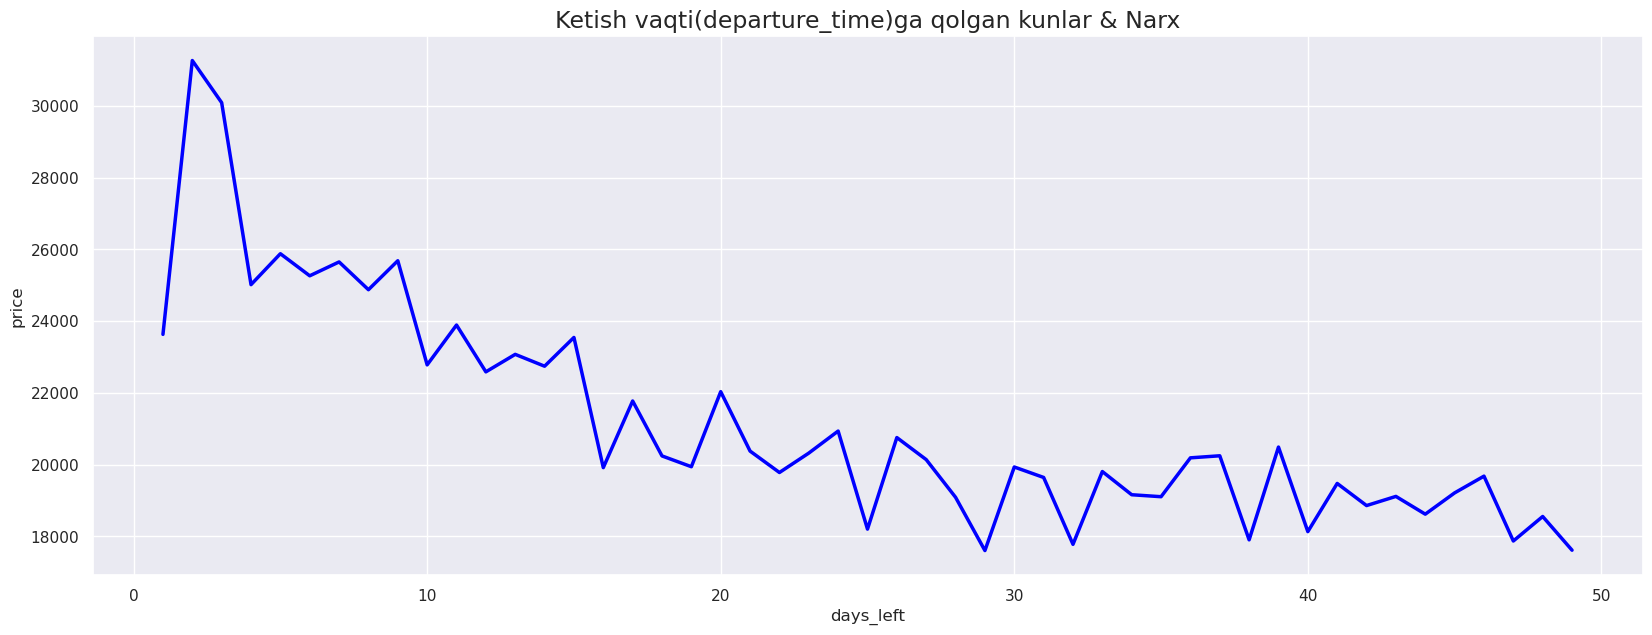

In [15]:
# Days Left for Departure & Price
plt.figure(figsize=[20, 7])
sns.lineplot(x='days_left', y='price', data=train, color='blue', linewidth=2.5, errorbar=None)
plt.title('Ketish vaqti(departure_time)ga qolgan kunlar & Narx', fontsize=17)
plt.show()

- **Umumiy holatda, parvoz kuni/vaqtidan avvalroq narx arzonligini va aksincha, parvoz vaqti yaqinlashgan sari narx ko'tarilib borishini ko'rishimiz mumkin.**

## Data Preprocessing

In [16]:
train.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [17]:
test.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [18]:
# Extract categorical columns
cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    print(train[col].value_counts())
    print("=" * 42)

Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: airline, dtype: int64
UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64
Mumbai       4068
Delhi        4022
Bangalore    3486
Kolkata      3092
Hyderabad    2748
Chennai      2584
Name: source_city, dtype: int64
Morning          4738
Early_Morning    4432
Evening          4341
Night            3231
Afternoon        3166
Late_Night         92
Name: departure_time, dtype: int64
one            16666
zero            2440
two_or_more      894
Name: stops, dtype: int64
Night            6142
Evening          5316
Morning          4086
Afternoon        2536
Early_Morning    1004
Late_Night        916
Name: arrival_time, dtype: int64
Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai

## Feature Engineering

In [19]:
def data_preprocessor(df):
    df = df.copy()
    
    # Create new features
    df[['flight_name', 'flight_num']] = df['flight'].str.split("-", expand=True)
    df['flight_num'] = df['flight_num'].astype('int')
    
    # Remove unnecessary columns
    df = df.drop(columns=['id', 'flight'])

    # Ordinal Encoding (ordinal) categorical columns
    dep_arr_time = {'Early_Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late_Night': 5}
    stops = {'one': 0, 'zero': 1, 'two_or_more': 2}
    classes = {'Economy': 0, 'Business': 1}
    df[['departure_time', 'arrival_time']] = df[['departure_time', 'arrival_time']].replace(dep_arr_time)
    df['stops'] = df['stops'].replace(stops)
    df['class'] = df['class'].replace(classes)
    
    # One-Hot Encoding (nominal) categorical columns
    nominal_cat_cols = ['airline', 'source_city', 'destination_city', 'flight_name']
    df = pd.get_dummies(df, columns=nominal_cat_cols)
    
    # Feature scaling numerical & ordinal columns
    num_cols = ['departure_time', 'stops', 'arrival_time', 'duration', 'days_left', 'flight_num']
    df[num_cols] = StandardScaler().fit_transform(df[num_cols])

    return df

In [21]:
# Splitting train set
X_train, y_train = train.drop('price', axis=1), train['price']
X_train = data_preprocessor(X_train)
X_test = data_preprocessor(test)

print(f'{X_train.shape=}')
print(f'{y_train.shape=}')
print(f'{X_test.shape=}')

X_train.shape=(20000, 31)
y_train.shape=(20000,)
X_test.shape=(5000, 31)


In [22]:
X_train.head()

,departure_time,stops,arrival_time,class,duration,days_left,flight_num,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,flight_name_6E,flight_name_AI,flight_name_G8,flight_name_I5,flight_name_SG,flight_name_UK
0,-1.321043,-0.417726,0.958550,0,0.289528,-0.361418,-0.307081,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.793923,1.558273,0.958550,0,-1.456827,-1.388976,1.867123,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.616054,-0.417726,0.213929,1,-0.362910,-1.535770,-0.288811,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,-0.616054,-0.417726,0.213929,0,-0.758285,0.152361,-0.359863,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,-1.321043,1.558273,-1.275311,0,-1.421900,-1.609167,2.019378,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [23]:
y_train.head()

0     7212
1     5292
2    60553
3     5760
4    10712
Name: price, dtype: int64

In [24]:
X_test.head()

,departure_time,stops,arrival_time,class,duration,days_left,flight_num,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,flight_name_6E,flight_name_AI,flight_name_G8,flight_name_I5,flight_name_SG,flight_name_UK
0,0.805184,-0.402242,0.975801,1,2.179304,-1.754111,-0.329982,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,-1.312236,-0.402242,0.975801,1,0.205481,0.583184,-0.339196,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-1.312236,1.658423,-2.006021,1,-1.413821,0.291022,-0.429794,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.510991,-0.402242,1.721257,0,-0.979909,-0.001139,-0.223005,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1.510991,-0.402242,-0.515110,0,0.547683,0.656225,-0.327423,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [25]:
# Correlation between features and the target
X_train.corrwith(y_train).abs().sort_values(ascending=False)

class                         0.937868
flight_name_UK                0.360410
airline_Vistara               0.360410
airline_Indigo                0.283825
flight_name_6E                0.283825
duration                      0.213158
flight_num                    0.211956
flight_name_G8                0.191557
airline_GO_FIRST              0.191557
airline_AirAsia               0.174272
flight_name_I5                0.174272
stops                         0.170436
airline_SpiceJet              0.115649
flight_name_SG                0.115649
days_left                     0.102545
airline_Air_India             0.070827
flight_name_AI                0.070827
destination_city_Delhi        0.064619
source_city_Delhi             0.041629
destination_city_Kolkata      0.041162
source_city_Mumbai            0.036125
source_city_Hyderabad         0.030848
departure_time                0.027532
destination_city_Chennai      0.020512
source_city_Bangalore         0.016966
destination_city_Hyderaba

## Modeling

### Cross-validation

![grid_search_cross_validation.png](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

©️image: scikit-learn.org

In [26]:
# K-Fold Cross Validation
models = [RandomForestRegressor(), XGBRegressor(), DecisionTreeRegressor()]
trained_models = {}
models_test_preds = pd.DataFrame()
models_scores = pd.DataFrame(columns=['R2', 'RMSE', 'MAE'])

kf = KFold(n_splits=10, shuffle=True, random_state=42)
for model in models:
    fold_predictions = []  # Store predictions for each fold
    # Store evaluation metrics:
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    for train_idx, val_idx in kf.split(X_train):
        X = X_train.loc[train_idx]
        y = y_train.loc[train_idx]
        X_val = X_train.loc[val_idx]
        y_val = y_train.loc[val_idx]

        model.fit(X, y)
        test_pred = model.predict(X_test)
        fold_predictions.append(test_pred)

        y_pred = model.predict(X_val)
        r2_scores.append(r2_score(y_val, y_pred))
        rmse_scores.append(mean_squared_error(y_val, y_pred, squared=False))
        mae_scores.append(mean_absolute_error(y_val, y_pred))

    # Store the trained model
    model_name = model.__class__.__name__
    trained_models[model_name] = model
    
    # Calculate the average of predictions across all folds
    fold_predictions = np.array(fold_predictions)
    models_test_preds[model_name] = fold_predictions.mean(axis=0)
    
    # Store evaluation metrics of the model
    models_scores.loc[model_name] = {
        'R2': np.mean(r2_scores), 'RMSE': np.mean(rmse_scores), 'MAE': np.mean(mae_scores)
    }

    # Print the evaluation metrics
    print("Model:", model_name)
    print("R2:", models_scores.loc[model_name, 'R2'])
    print("RMSE:", models_scores.loc[model_name, 'RMSE'])
    print("=" * 42)

Model: RandomForestRegressor
R2: 0.9793489600644045
RMSE: 3268.515092032497
Model: XGBRegressor
R2: 0.9780248482623387
RMSE: 3373.182946506337
Model: DecisionTreeRegressor
R2: 0.9641222010113306
RMSE: 4309.163229384326


In [27]:
trained_models

{'RandomForestRegressor': RandomForestRegressor(),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'DecisionTreeRegressor': DecisionTreeRegressor()}

## Evaluation

In [28]:
models_scores.sort_values('RMSE')

,R2,RMSE,MAE
RandomForestRegressor,0.979349,3268.515092,1578.972466
XGBRegressor,0.978025,3373.182947,1889.329374
DecisionTreeRegressor,0.964122,4309.163229,1789.572450


### Hyperparameter tuning

> **❗WARNING:** GridSearchCV'da model uchun ko'p hyperparameter'lar qo'llanilgani sari ko'proq vaqt hisoblash quvvati (computing power) talab qilinadi.

In [29]:
# start_time = time.time()

# models_params = {
#     RandomForestRegressor(n_jobs=-1):{
#         'n_estimators': [200, 300, 400],
#         'max_depth': [None, 3, 7, 10],
#         'min_samples_split': [2, 4, 6],
#         'min_samples_leaf': [1, 2, 3],
#         'max_features': [1.0, 'sqrt', 'log2']},
#     XGBRegressor(n_jobs=-1):{
#         'n_estimators': [200, 300, 400],
#         'max_depth': [3, 7, 10],
#         'learning_rate': [1, 2, 3]},
#     DecisionTreeRegressor():{
#         'max_depth': [None, 3, 7, 10],
#         'min_samples_split': [2, 4, 6],
#         'min_samples_leaf': [1, 2, 3],
#         'max_features': [None, 'sqrt', 'log2']}
# }

# for model, param_grid in models_params.items():
#     grid_search = GridSearchCV(
#         estimator=model,
#         param_grid=param_grid,
#         scoring='neg_root_mean_squared_error',
#         cv=10,
#         n_jobs=-1)
#     grid_search.fit(X_train, y_train)

#     best_params = grid_search.best_params_
#     print("Model:", model.__class__.__name__)
#     print("Best Hyperparameters:", best_params)

#     # Set the best hyperparameters for the model
#     model.set_params(**best_params)
#     model.fit(X_train, y_train)

#     # Evaluate the model performance
#     y_pred = model.predict(X_train)
#     rmse = mean_squared_error(y_train, y_pred, squared=False)
#     print("RMSE:", rmse)
#     print("=" * 42)


# # Display execution time
# end_time = time.time()
# execution_time = end_time - start_time
# hours = int(execution_time // 3600)
# minutes = int((execution_time % 3600) // 60)
# seconds = int(execution_time % 60)
# print(f"Execution Time: {hours}h {minutes}m {seconds}s")

**GridSearchCV results:**

Model: RandomForestRegressor \
Best Hyperparameters: {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400} \
RMSE: 1771.0501979465755

**==========================================** \
Model: XGBRegressor \
Best Hyperparameters: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 400} \
RMSE: 3694.7648777591567

**==========================================** \
Model: DecisionTreeRegressor \
Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 6} \
RMSE: 2437.767179334913

**==========================================**

Execution Time: 2h 6m 14s

- **Natija:** Modellarning optimal hyperparameter'larini qo'llab train qilganda model xatoligi (RMSE) deyarli o'zgarmadi.

## Submission

In [30]:
models_test_preds

,RandomForestRegressor,XGBRegressor,DecisionTreeRegressor
0,56196.872,60941.335938,58301.6
1,62650.824,60369.539062,62408.3
2,23325.880,24035.017578,23703.6
3,2625.481,3276.002441,2238.8
4,5710.887,6018.256836,5743.1
...,...,...,...
4995,60036.576,57688.667969,60978.0
4996,4560.291,4499.855957,4387.2
4997,50266.803,54394.230469,50271.0
4998,48625.070,45048.382812,50350.5


In [31]:
sample_sub.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [32]:
rf_preds = models_test_preds['RandomForestRegressor']
sample_sub['price'] = rf_preds
sample_sub.to_csv("rf_kf10.csv", index=False)

In [33]:
pd.read_csv("/kaggle/working/rf_kf10.csv").head()

,id,price
0,1,56196.872
1,2,62650.824
2,3,23325.880
3,4,2625.481
4,5,5710.887
